In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [44]:
df = pd.read_csv('/content/Mall_Customers.csv')

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Loading the training dataset

In [46]:
X= df.iloc[:,[3,4]].values

X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

Choosing the number of clusters

In [47]:
WCSS=[]

for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init="k-means++", random_state=42)
  kmeans.fit(X)
  WCSS.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

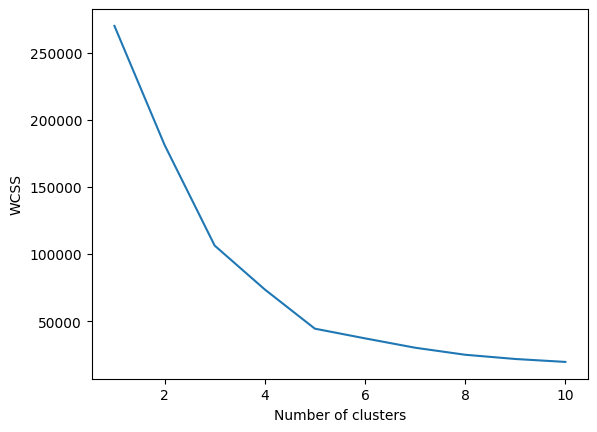

In [48]:
#pplotting the elbow curve

plt.plot(range(1,11),WCSS)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.show()

Optimum no. of clusters = 5

In [49]:
kmeans = KMeans(n_clusters = 5)
kmeans_labels = kmeans.fit_predict(X)

kmeans_labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [50]:
print(kmeans.cluster_centers_)

[[88.2        17.11428571]
 [55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [26.30434783 20.91304348]]


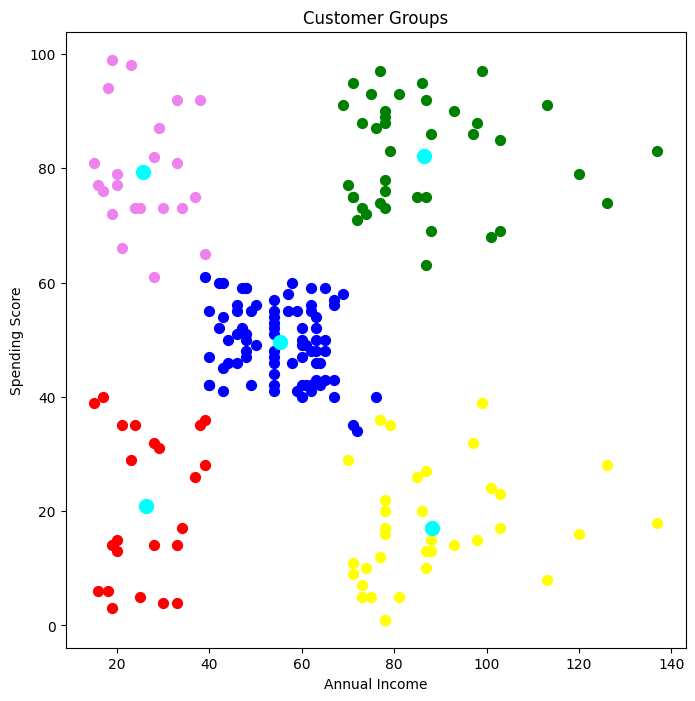

In [51]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(X[label==0,0], X[label==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[label==1,0], X[label==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[label==2,0], X[label==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[label==3,0], X[label==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[label==4,0], X[label==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [52]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


# Generate the linkage matrix
linked = linkage(X, method='ward')

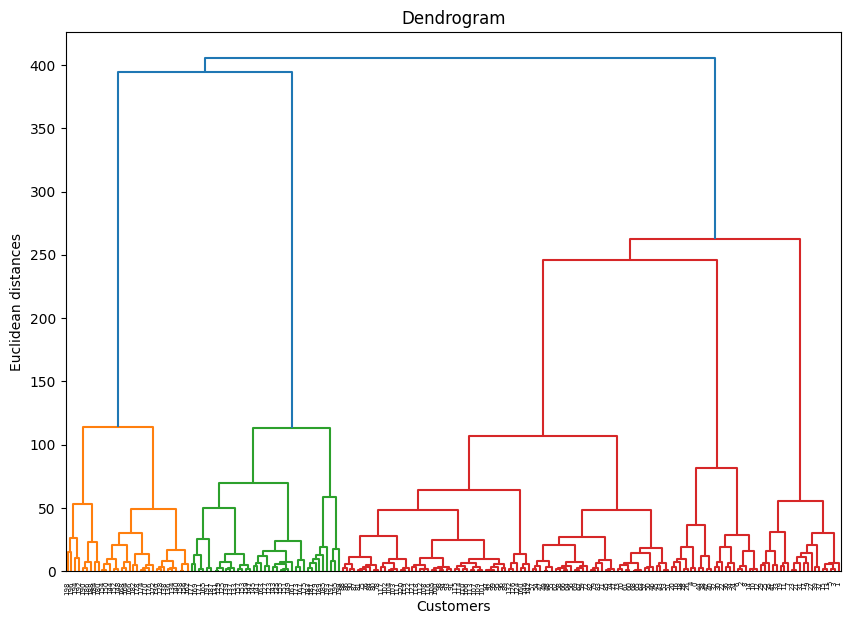

In [53]:
# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [59]:
# Apply hierarchical clustering
hierarchical_clustering = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
hierarchical_labels = hierarchical_clustering.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


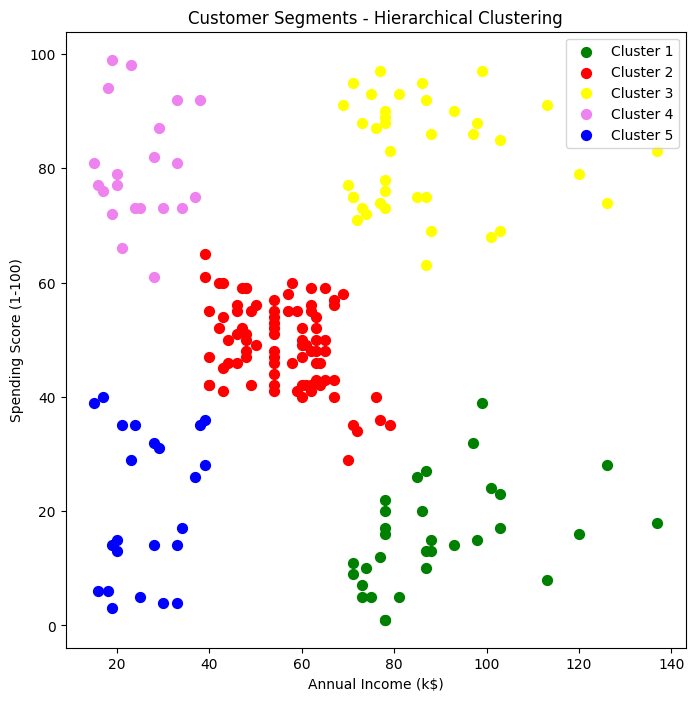

In [60]:
# Plot the clusters
plt.figure(figsize=(8, 8))
plt.scatter(X[labels == 0, 0], X[labels == 0, 1], s=50, c='green', label='Cluster 1')
plt.scatter(X[labels == 1, 0], X[labels == 1, 1], s=50, c='red', label='Cluster 2')
plt.scatter(X[labels == 2, 0], X[labels == 2, 1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[labels == 3, 0], X[labels == 3, 1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[labels == 4, 0], X[labels == 4, 1], s=50, c='blue', label='Cluster 5')
plt.title('Customer Segments - Hierarchical Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

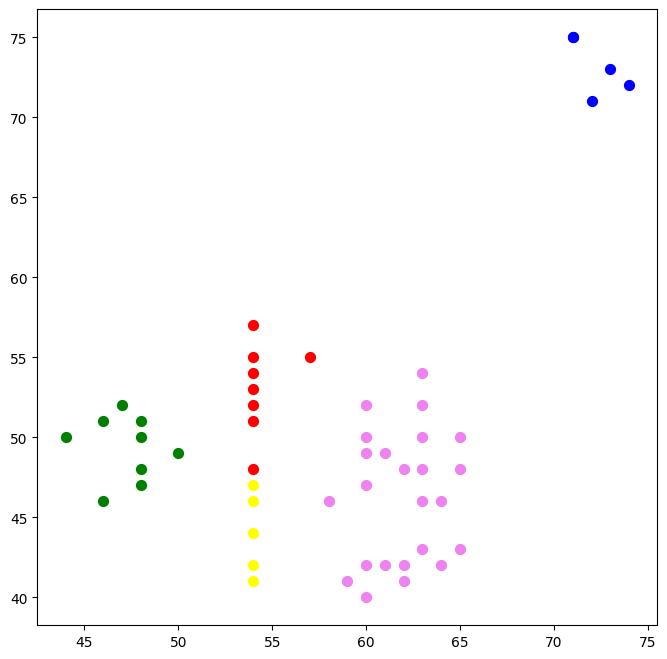

In [61]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=3, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# Plot the clusters
plt.figure(figsize=(8, 8))
plt.scatter(X[dbscan_labels == 0, 0], X[dbscan_labels == 0, 1], s=50, c='green', label='Cluster 1')
plt.scatter(X[dbscan_labels == 1, 0], X[dbscan_labels == 1, 1], s=50, c='red', label='Cluster 2')
plt.scatter(X[dbscan_labels == 2, 0], X[dbscan_labels == 2, 1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[dbscan_labels == 3, 0], X[dbscan_labels == 3, 1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[dbscan_labels == 4, 0], X[dbscan_labels == 4, 1], s=50, c='blue', label='Cluster 5')

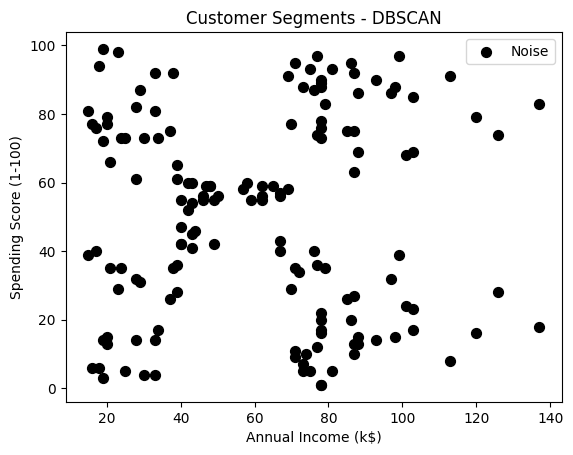

In [62]:
# Plot noise points (if any)
plt.scatter(X[dbscan_labels == -1, 0], X[dbscan_labels == -1, 1], s=50, c='black', label='Noise')
plt.title('Customer Segments - DBSCAN')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

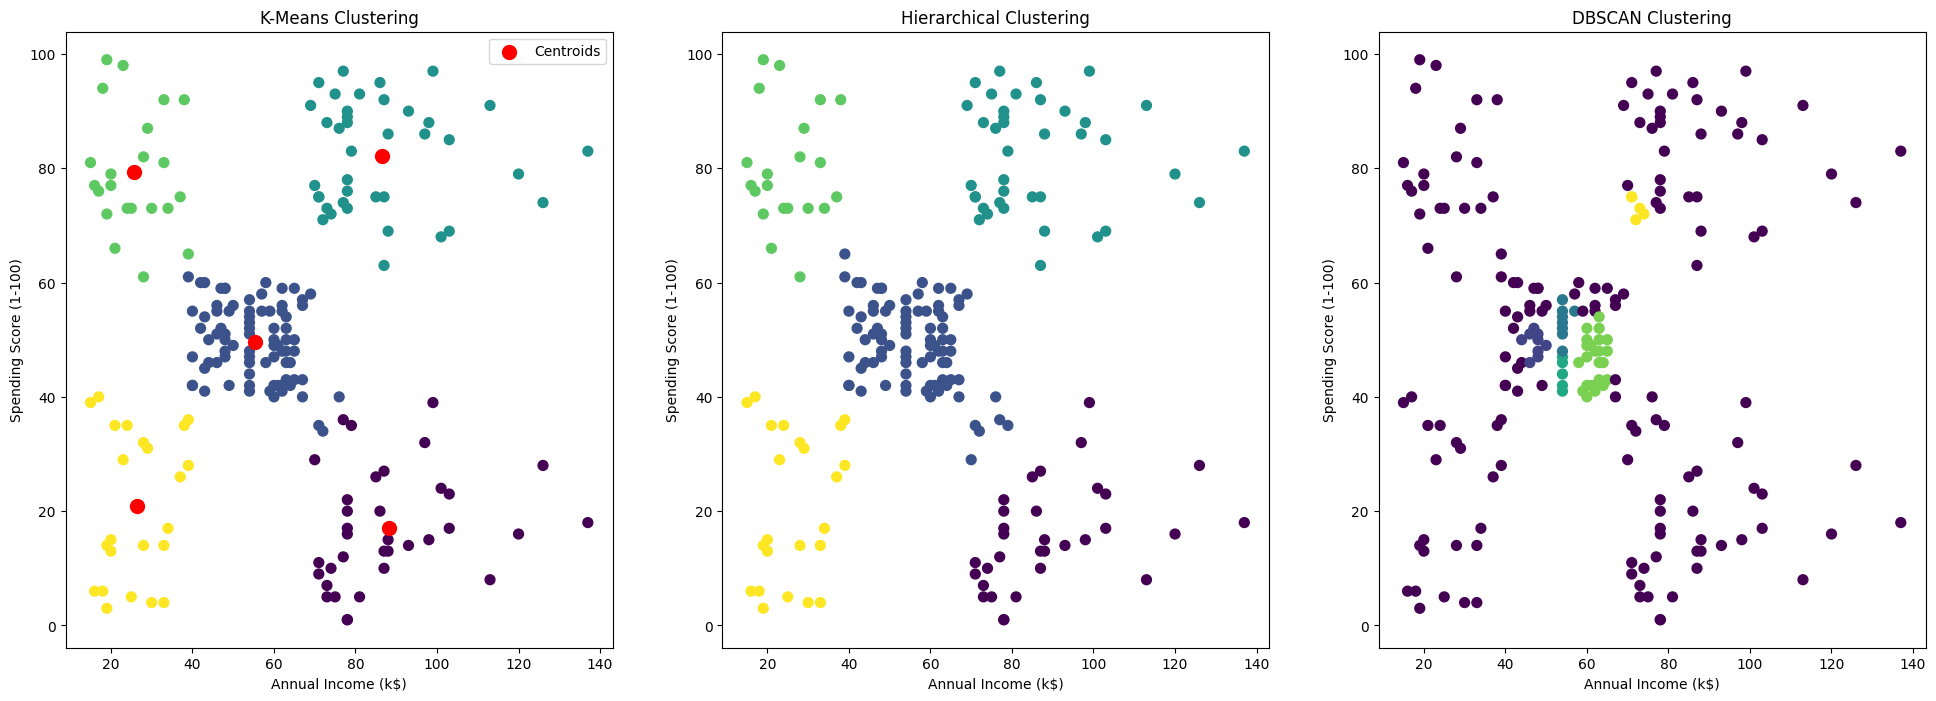

In [63]:
fig, axs = plt.subplots(1, 3, figsize=(24, 8))

# K-Means plot
axs[0].scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', s=50)
axs[0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', label='Centroids')
axs[0].set_title('K-Means Clustering')
axs[0].set_xlabel('Annual Income (k$)')
axs[0].set_ylabel('Spending Score (1-100)')
axs[0].legend()

# Hierarchical plot
axs[1].scatter(X[:, 0], X[:, 1], c=hierarchical_labels, cmap='viridis', s=50)
axs[1].set_title('Hierarchical Clustering')
axs[1].set_xlabel('Annual Income (k$)')
axs[1].set_ylabel('Spending Score (1-100)')

# DBSCAN plot
axs[2].scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis', s=50)
axs[2].set_title('DBSCAN Clustering')
axs[2].set_xlabel('Annual Income (k$)')
axs[2].set_ylabel('Spending Score (1-100)')

plt.show()

In [64]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Silhouette Score
kmeans_silhouette = silhouette_score(X, kmeans_labels)
hierarchical_silhouette = silhouette_score(X, hierarchical_labels)
dbscan_silhouette = silhouette_score(X, dbscan_labels)

# Davies-Bouldin Index
kmeans_db = davies_bouldin_score(X, kmeans_labels)
hierarchical_db = davies_bouldin_score(X, hierarchical_labels)
dbscan_db = davies_bouldin_score(X, dbscan_labels)

# Calinski-Harabasz Index
kmeans_ch = calinski_harabasz_score(X, kmeans_labels)
hierarchical_ch = calinski_harabasz_score(X, hierarchical_labels)
dbscan_ch = calinski_harabasz_score(X, dbscan_labels)

print(f'Silhouette Score: K-Means={kmeans_silhouette}, Hierarchical={hierarchical_silhouette}, DBSCAN={dbscan_silhouette}')
print(f'Davies-Bouldin Index: K-Means={kmeans_db}, Hierarchical={hierarchical_db}, DBSCAN={dbscan_db}')
print(f'Calinski-Harabasz Index: K-Means={kmeans_ch}, Hierarchical={hierarchical_ch}, DBSCAN={dbscan_ch}')


Silhouette Score: K-Means=0.553931997444648, Hierarchical=0.5529945955148897, DBSCAN=-0.2554528275053913
Davies-Bouldin Index: K-Means=0.5725628995597082, Hierarchical=0.5782207452369454, DBSCAN=5.994028699357163
Calinski-Harabasz Index: K-Means=247.35899338037282, Hierarchical=243.07142892964563, DBSCAN=0.9129688314069694
